# Task 2

## Stock Market Prediction And Forecasting Using Stacked LSTM

In this project, we will be working with the dataset of TATAGLOBAL stock. Keras, tensorflow and LSTM (Long Term Short Memory) model will be utilized in this project. We will be trying to determine the value of the following stock in its near future as well.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import array
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import calendar

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

### Loading Dataset

Since we are given url of the dataset, we will be using pandas to import the dataset from that url.

In [3]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [4]:
data = pd.read_csv(url, parse_dates=True, index_col = "Date")

### Data Preprocessing

In [5]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
data.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
data.shape

(2035, 7)

In [8]:
data.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

As we can see from the result of above code block, there are no null values in the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [10]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


We will be working with the 'Close' feature of the dataset here to make our predictions and plot graphs hence it will be the target vector for this project. For this we will be creating a subset of our main dataset.

In [11]:
data_close = data.reset_index()['Close']

In [12]:
data_close.shape

(2035,)

Exploratory Data Analysis

#### _Line Plots_

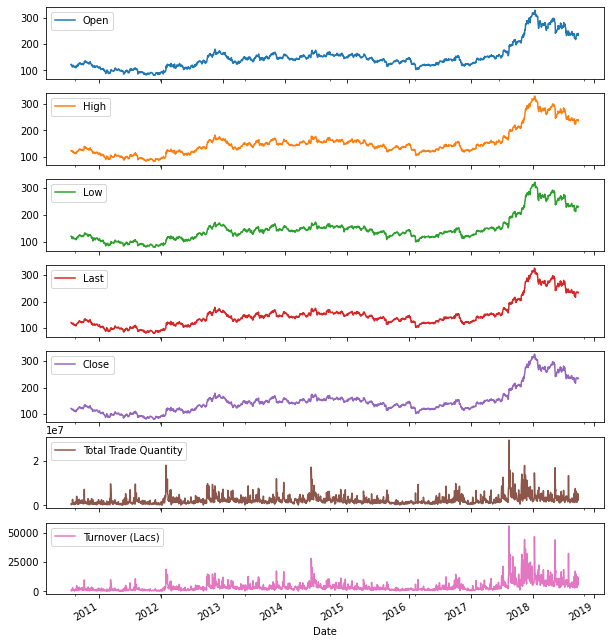

In [13]:
data.plot(subplots=True, figsize=(10, 12));

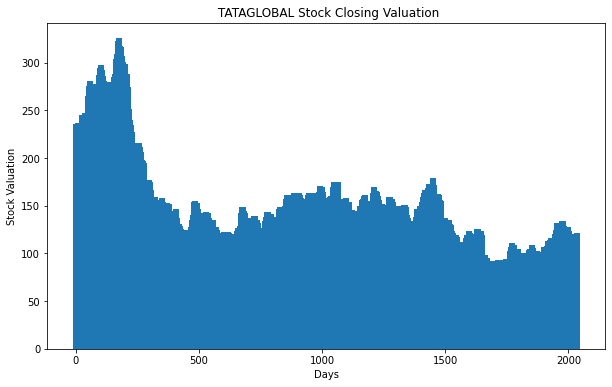

In [14]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(data_close.index,
       data_close,
       width=25,
       align='center')
plt.xlabel('Days')
plt.ylabel('Stock Valuation')
plt.title(' TATAGLOBAL Stock Closing Valuation');

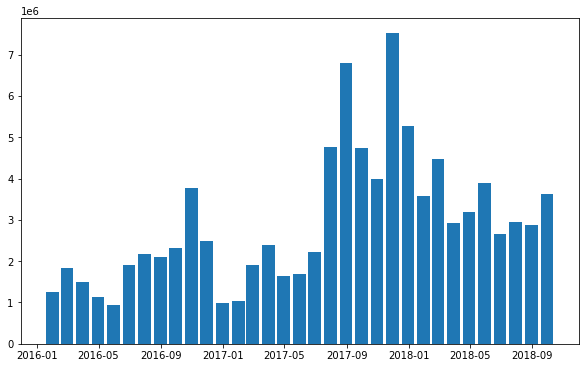

In [15]:
data_month = data.resample("M").mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(data_month['2016':].index, data_month.loc['2016':, "Total Trade Quantity"], width=25, align='center');

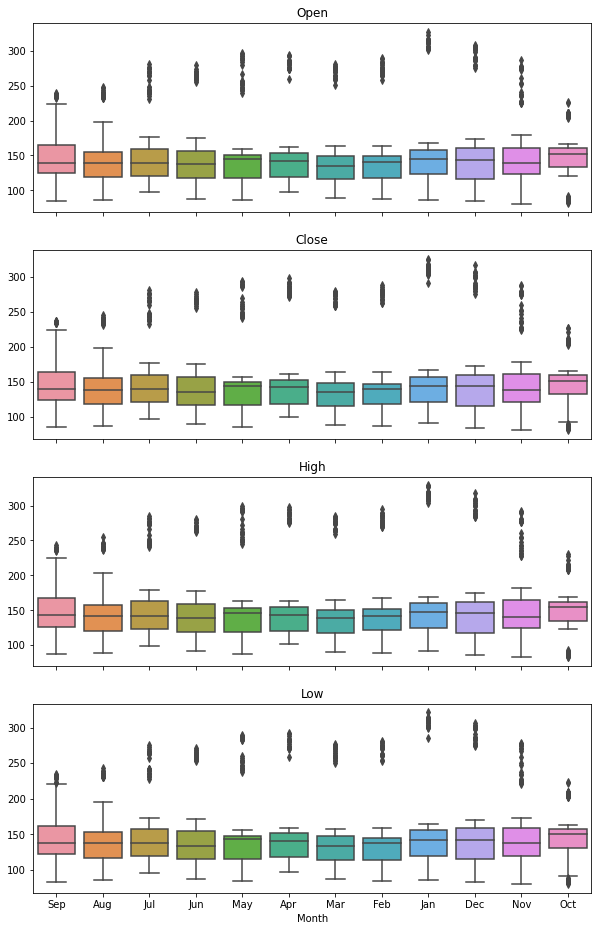

In [16]:
data_sub = data
data_sub['Date'] = data.index
data_sub['Month'] = data_sub['Date'].dt.strftime('%b')
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)
for name, ax in zip(['Open', 'Close', 'High', 'Low'], axes):
    sns.boxplot(data = data_sub, x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

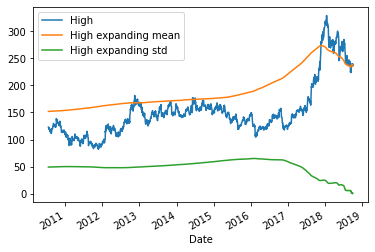

In [17]:
fig, ax = plt.subplots()
ax = data.High.plot(label='High')
ax = data.High.expanding().mean().plot(label='High expanding mean')
ax = data.High.expanding().std().plot(label='High expanding std')
ax.legend();

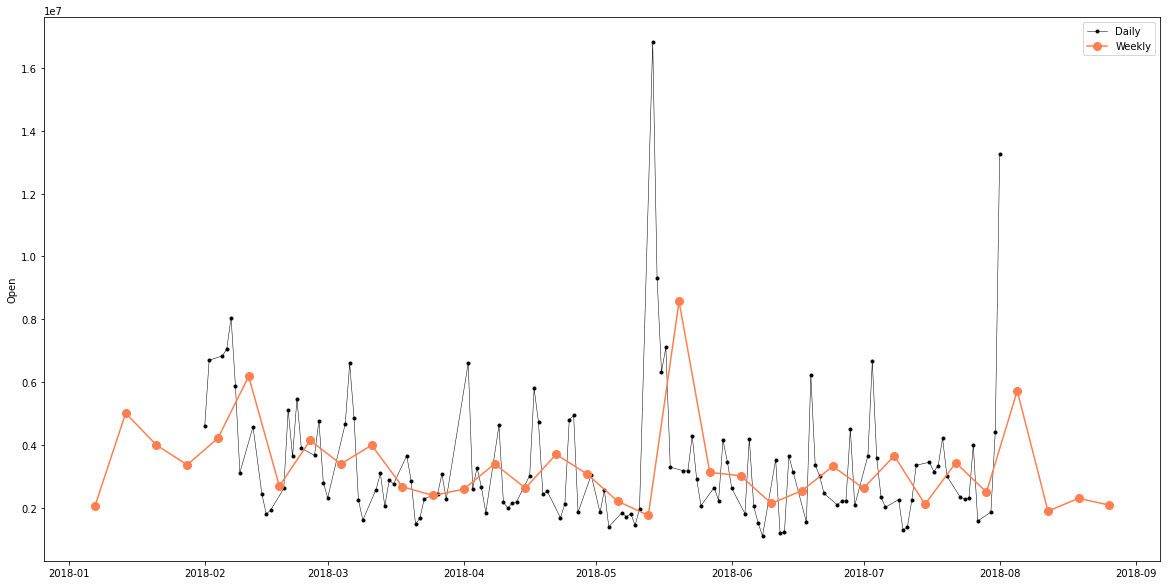

In [18]:
data_week = data_sub.resample("W").mean()
start, end = '2018-01', '2018-08'
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(data_sub.loc[start:end, 'Total Trade Quantity'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(data_week.loc[start:end, 'Total Trade Quantity'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral') 
ax.set_ylabel("Open")
ax.legend();

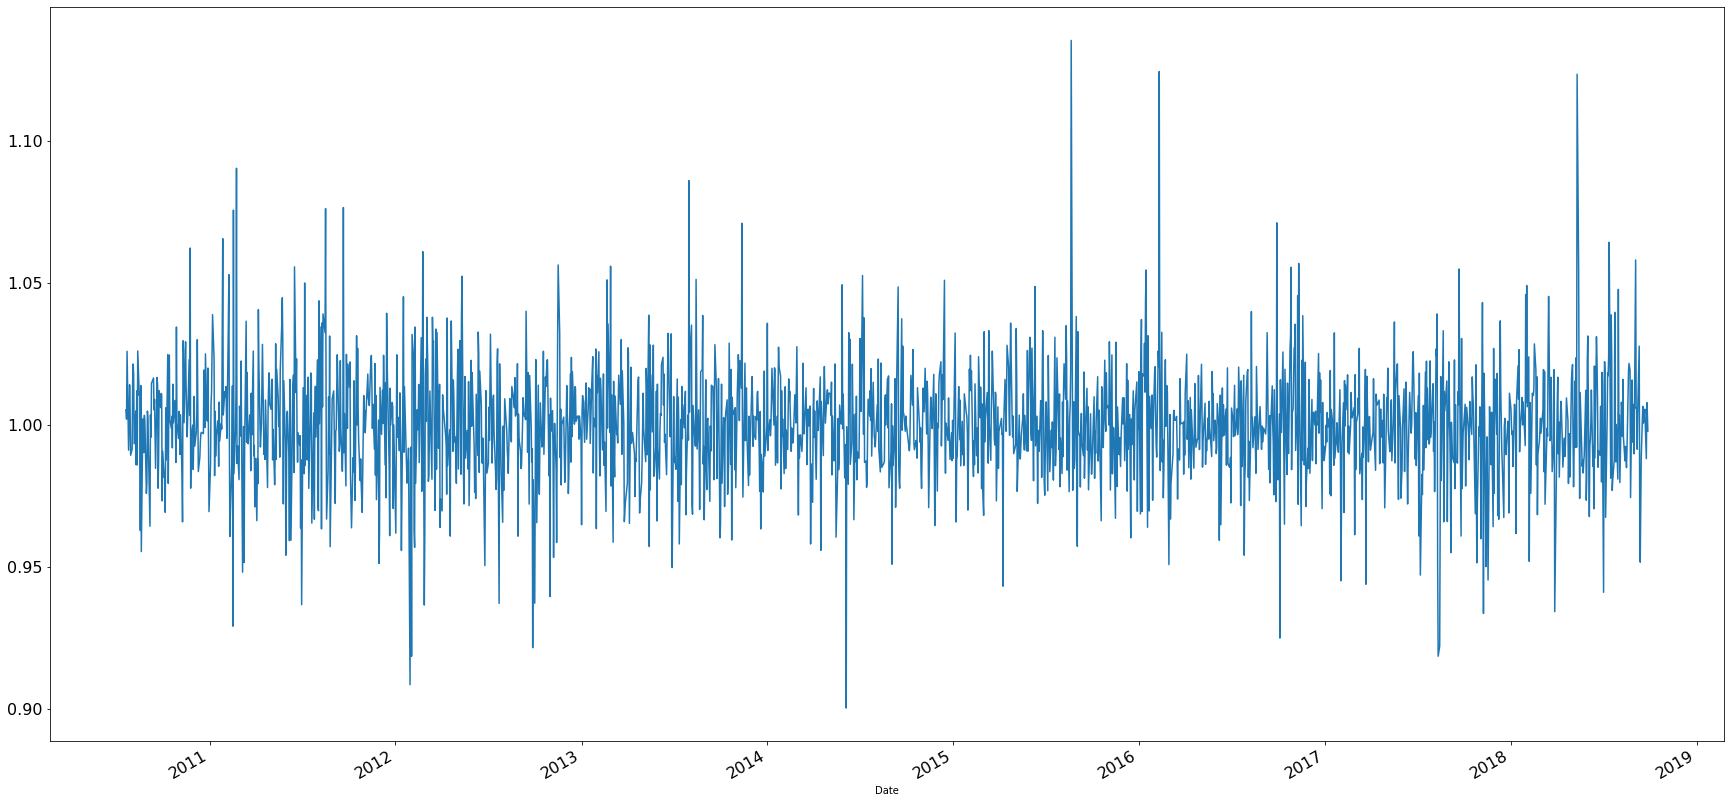

In [19]:
data['Change'] = data.Close.div(data.Close.shift())
data['Change'].plot(figsize=(30, 15), fontsize = 16);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


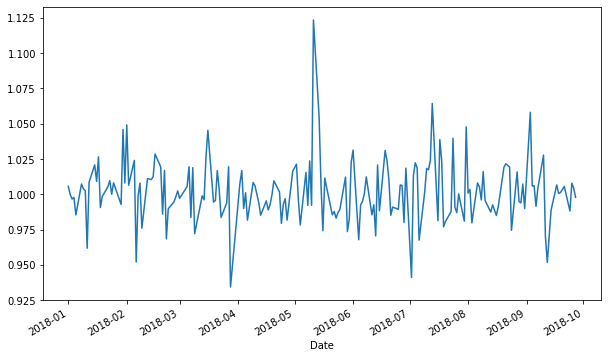

In [20]:
data['2018']['Change'].plot(figsize=(10, 6));

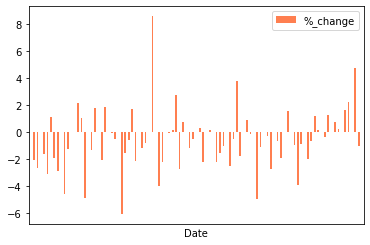

In [21]:
data_month.loc[:, '%_change'] = data.Close.pct_change()*100
fig, ax = plt.subplots()
data_month['%_change'].plot(kind='bar', color='coral', ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
ax.legend();

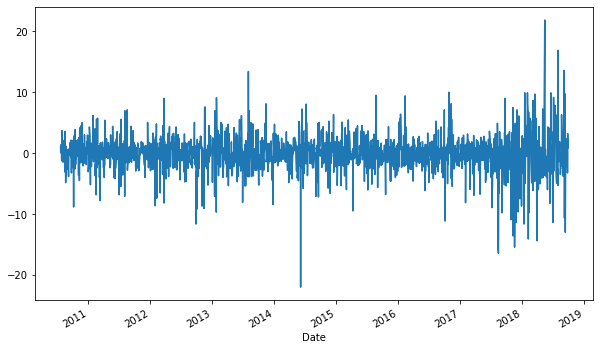

In [50]:
data.High.diff().plot(figsize=(10, 6));

We can even create a pivot table with the dataset to get a more refined information on the opening valuations of the stock in the duration.

In [23]:
data_sub

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Date,Month,Change
Date,,,,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,2018-09-28,Sep,NaN
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,2018-09-27,Sep,0.997861
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,2018-09-26,Sep,1.004287
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,2018-09-25,Sep,1.007898
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,2018-09-24,Sep,0.988141
...,...,...,...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98,2010-07-27,Jul,1.003383
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01,2010-07-26,Jul,0.991150
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31,2010-07-23,Jul,1.025935


In [24]:
data_sub['Year'] = data_sub['Date'].dt.strftime('%Y')
all_month_year_data = pd.pivot_table(data_sub, values="Open",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_data.index)]]
all_month_year_data = all_month_year_data.set_index(named_index)
all_month_year_data

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
Apr,0.000000,103.594444,118.412500,133.917500,153.772222,151.986842,120.447222,151.894444,280.211905,153.641776
Aug,115.077273,99.169048,130.645238,144.592500,154.042105,132.519048,139.940909,180.250000,237.623810,147.943617
Dec,113.747727,88.416667,166.395000,150.183333,153.490909,138.470455,122.288636,292.545000,0.000000,151.796176
Feb,0.000000,94.930000,118.265000,141.610000,142.092105,156.175000,113.057143,140.410526,274.673684,146.709810
Jan,0.000000,106.710000,94.265909,157.152174,150.978261,155.240476,134.227500,127.126190,312.136364,155.676163
Jul,118.612500,103.002381,117.136364,150.334783,160.154545,137.110870,133.707500,167.290476,256.013636,151.885440
Jun,0.000000,94.681818,109.185714,141.852500,164.290476,135.056818,124.395455,154.092857,265.209524,148.096176
Mar,0.000000,96.304545,116.268182,129.842105,143.059524,154.661905,116.105000,145.118182,269.663158,144.783434
May,0.000000,96.163636,110.425000,145.684783,150.109524,144.977500,119.159091,151.356818,266.731818,148.086207
Nov,122.707143,86.335000,164.267500,153.120000,158.516667,131.150000,123.969048,251.311364,0.000000,149.867391


From the above pivot table we can further create a heatmap to get more information about the general trend in the sway of opening valuation of the stock.

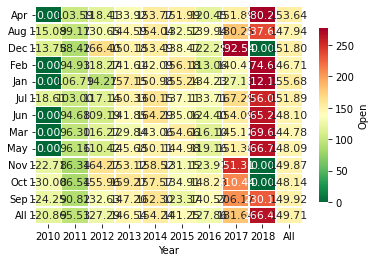

In [25]:
ax = sns.heatmap(all_month_year_data, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})

### Model Preparation

__Note__: Its advisable to normalize the data before model fitting. This will help boost the performance.
Since LSTM are very sensitive to scale of the data as well, we will make use of a very popular normalization tool call MinMaxScaler to scale our dataset before any further processing.

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [27]:
print(data_close)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


As we can see here, the data in data_close subset has been transformed according to our requirement.

### Train-Test Split

Since this is a Time-Series dataset, we can't simple apply the train_test_split tool here on the dataset. We have to manually set the split range and divide the dataset accordingly in order to get the consistent train and test sets.

In [28]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train_data, test_data = data_close[0:train_size,:], data_close[train_size:, :1]

In [29]:
train_size, test_size

(1424, 611)

Now that we have defined the ranges of training and test sets successfully, we will move onto the next stage of data preprocessing stage, which is creating the X_train, y_train and X_test, y_test datasets.

In [30]:
def dataset_creation(data, time_seq=1):
  X_data, y_data = [], []
  for i in range(len(data)-time_seq-1):
    lst = data[i:(i+time_seq), 0]
    X_data.append(lst)
    y_data.append(data[i + time_seq, 0])
  return np.array(X_data), np.array(y_data)

Above code block facilitates a systematic splitting of a time-series dataset into training and test sets. We can set the time_seq as per our requirement and control the range of values for each training and testing sets.

In [31]:
time_seq = 100
X_train, y_train = dataset_creation(train_data, time_seq)
X_test, y_test = dataset_creation(test_data, time_seq)

In [32]:
print(X_train.shape, y_train.shape)

(1323, 100) (1323,)


In [33]:
print(X_test.shape, y_test.shape)

(510, 100) (510,)


As we can see above, the X and y training/testing sets have values consistent with out original dataset after the splitting. So we can conclude the data preprocessing here.

### Building Stacked LSTM *Model*

In [34]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Above, we converted the 2 dimensional dataset into 3 dimension, basically adding another entity i.e features. So we will end up with an input stream looking like [samples, time_seq, features] which is how an LSTM model takes its inputs.

#### Model Instantiation

Since this is a stacked LSTM model, we will we adding layers, one after anothe to the model in a fashioned sequence. The loss function and optimizer for this instance of the model will MEA (mean squared error) and 'adam' respectively.

In [35]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Above, we can see the summary of the created model. Now, fitting the model to our training set will take place.

In [37]:
model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 15s 364ms/step - loss: 0.0249 - val_loss: 0.0050
Epoch 2/100
21/21 [==============================] - 7s 327ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 3/100
21/21 [==============================] - 7s 324ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/100
21/21 [==============================] - 7s 326ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/100
21/21 [==============================] - 7s 325ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/100
21/21 [==============================] - 7s 325ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/100
21/21 [==============================] - 7s 326ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/100
21/21 [==============================] - 7s 324ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/100
21/21 [==============================] - 7s 327ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 10/100
21/21 [==============================] - 7s 332ms/step - loss: 0.0013 - val_l

We have completed training our model so now we can move onto making predictions with our model.

In [38]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

Now, we will have to reverse scale our prediction to original form since we had already scaled our data prior to making predictions.

In [39]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

We scaled back to our original form because now we have to find the RMSE performance metrix.

In [40]:
math.sqrt(mean_squared_error(y_train, train_pred))

164.8955285040981

In [41]:
math.sqrt(mean_squared_error(y_test, test_pred))

108.00717548705252

The RMSE performance metrix of both train and test sets have very less difference between them which is a good thing for our model.

#### Plotting the predictions

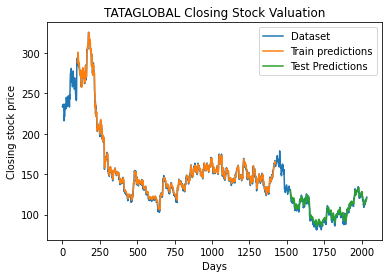

In [42]:
look_back = 100
trainPredPlot = np.empty_like(data_close)
trainPredPlot[:, :] = np.nan
trainPredPlot[look_back:len(train_pred) + look_back, :] = train_pred

testPredPlot = np.empty_like(data_close)
testPredPlot[:, :] = np.nan
testPredPlot[len(train_pred) + (look_back*2) + 1 : len(data_close) - 1, :] = test_pred

plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.xlabel('Days')
plt.ylabel('Closing stock price')
plt.title('TATAGLOBAL Closing Stock Valuation')
plt.legend(['Dataset','Train predictions', 'Test Predictions'],loc='best')
plt.show();

In the above plot, we can see the distinct phases of our dataset.

### Predicting stock Price for next 100 days

In [43]:
len(test_data)

611

In [44]:
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [45]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

Next, we will write a code block with the logic to predict the next 100 days stock price.

In [46]:
lst_out = []
n_steps = 100
i = 0
while(i<100):
  if(len(temp_input) > 100):
    x_input = np.array(temp_input[1:])
    print(f"{i} day input {x_input}")
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    pred = model.predict(x_input, verbose=0)
    print(f"{i} day input {pred}")
    temp_input.extend(pred[0].tolist())
    temp_input = temp_input[1:]
    lst_out.extend(pred.tolist())
    i += 1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    pred = model.predict(x_input, verbose=0)
    print(pred[0])
    temp_input.extend(pred[0].tolist())
    print(len(temp_input))
    lst_out.extend(pred.tolist())
    i += 1

print(lst_out)

[0.16740236]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In order to predict next 100 day's closing valuation we need to set the range for it.

In [47]:
day_new = np.arange(1,101)
day_pred = np.arange(101,201)

In [48]:
len(data_close)

2035

Next, we will plot the predictions made but they need to scaled first just like we did previously.

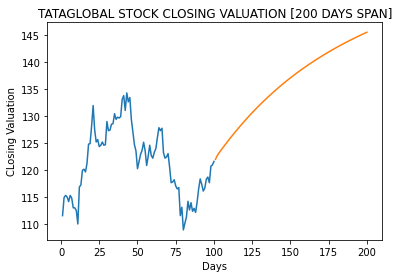

In [53]:
plt.plot(day_new, scaler.inverse_transform(data_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_out))
plt.xlabel('Days')
plt.ylabel('CLosing Valuation')
plt.title('TATAGLOBAL STOCK CLOSING VALUATION [200 DAYS SPAN]');

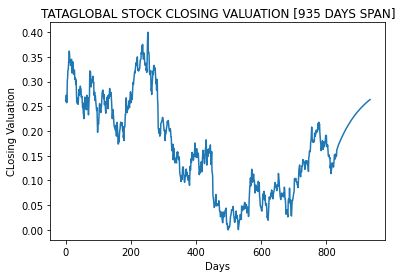

In [57]:
data_final = data_close.tolist()
data_final.extend(lst_out)
plt.plot(data_final[1200:])
plt.xlabel('Days')
plt.ylabel('CLosing Valuation')
plt.title('TATAGLOBAL STOCK CLOSING VALUATION [935 DAYS SPAN]');

In [58]:
data_final = scaler.inverse_transform(data_final).tolist()

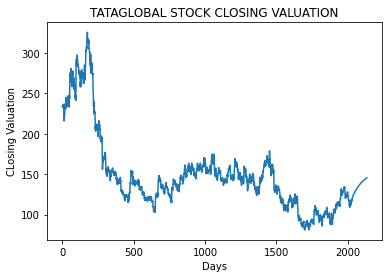

In [59]:
plt.plot(data_final)
plt.xlabel('Days')
plt.ylabel('CLosing Valuation')
plt.title('TATAGLOBAL STOCK CLOSING VALUATION');

Above, you can see the predictions for the next 100 days plotted in different timeframes. The curve is much smoother and we can see that the valuation will increase steadily over the next 100 days. Hence we can say that the model is reliable and trustworthy.

__NOTE__: The project is strictly for research and learning purposes and shouldn't be used for real life stock market practices.